In [11]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

df = pd.read_csv('results.csv')
df.describe()

,nodes,ttl,seed,buffer_size,sim_time,created,started,relayed,aborted,dropped,...,latency_avg,latency_med,hopcount_avg,hopcount_med,buffertime_avg,buffertime_med,distance_avg,d_dist_avg,speed_avg,task_id
count,30000.000000,30000.0,30000.000000,30000.000000,30000.0,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,23400.000000,30000.000000
mean,516.666667,300.0,46805.980000,115.000000,21600.0,722.708333,95422.027333,94564.854167,836.221400,26840.205100,...,5135.697897,4727.807633,3.297740,3.160167,9419.574006,10720.349200,6305.963786,6250.078595,2.225549,299.500000
std,318.421527,0.0,31417.184484,53.852546,0.0,461.006913,112298.584907,111107.400718,1352.253247,45165.578321,...,1919.996050,1862.322475,0.905498,0.973727,3835.888203,5091.115339,143.894765,197.647559,0.786819,173.207727
min,100.000000,300.0,22.000000,50.000000,21600.0,238.000000,1411.000000,1408.000000,0.000000,0.000000,...,1350.959300,1296.000000,1.692100,2.000000,969.807500,850.000000,5823.118792,5252.670543,0.935014,0.000000
25%,200.000000,300.0,15475.000000,75.000000,21600.0,404.000000,5017.750000,4985.000000,27.000000,515.000000,...,3528.717775,3278.750000,2.486500,2.000000,7896.492575,7755.000000,6218.507317,6127.099389,1.637625,149.750000
50%,500.000000,300.0,49338.500000,100.000000,21600.0,594.000000,50115.500000,49807.000000,241.000000,3195.500000,...,5380.926600,4643.000000,3.220700,3.000000,10513.594500,11657.500000,6306.777725,6253.277227,2.053063,299.500000
75%,800.000000,300.0,73906.000000,150.000000,21600.0,910.750000,157166.250000,154693.500000,1063.000000,36617.500000,...,6550.592100,6080.250000,3.952400,4.000000,12535.677800,14725.000000,6392.135312,6373.128338,2.521911,449.250000
max,1000.000000,300.0,98820.000000,200.000000,21600.0,1472.000000,431044.000000,424530.000000,6704.000000,311600.000000,...,9693.222200,10327.000000,6.067900,6.000000,13981.541400,17660.000000,6929.994313,7041.151982,5.376340,599.000000


In [12]:
#Filter results for a specific value e.g.

#Fix the buffer size to 50MB
df = df[df.buffer_size == 50] 
#Discard results for 800 and 1000
df = df[df.nodes <= 600]

In [13]:
# Style
markers = ['o','s', '^', 'v', '<', '>']
x_axis_order = ['5,25', '25,35', '35,60', '60, 120']

sns.set(style='whitegrid', font='Roboto', font_scale=2, rc={"lines.linewidth": 0.8, "legend.markerscale":3})

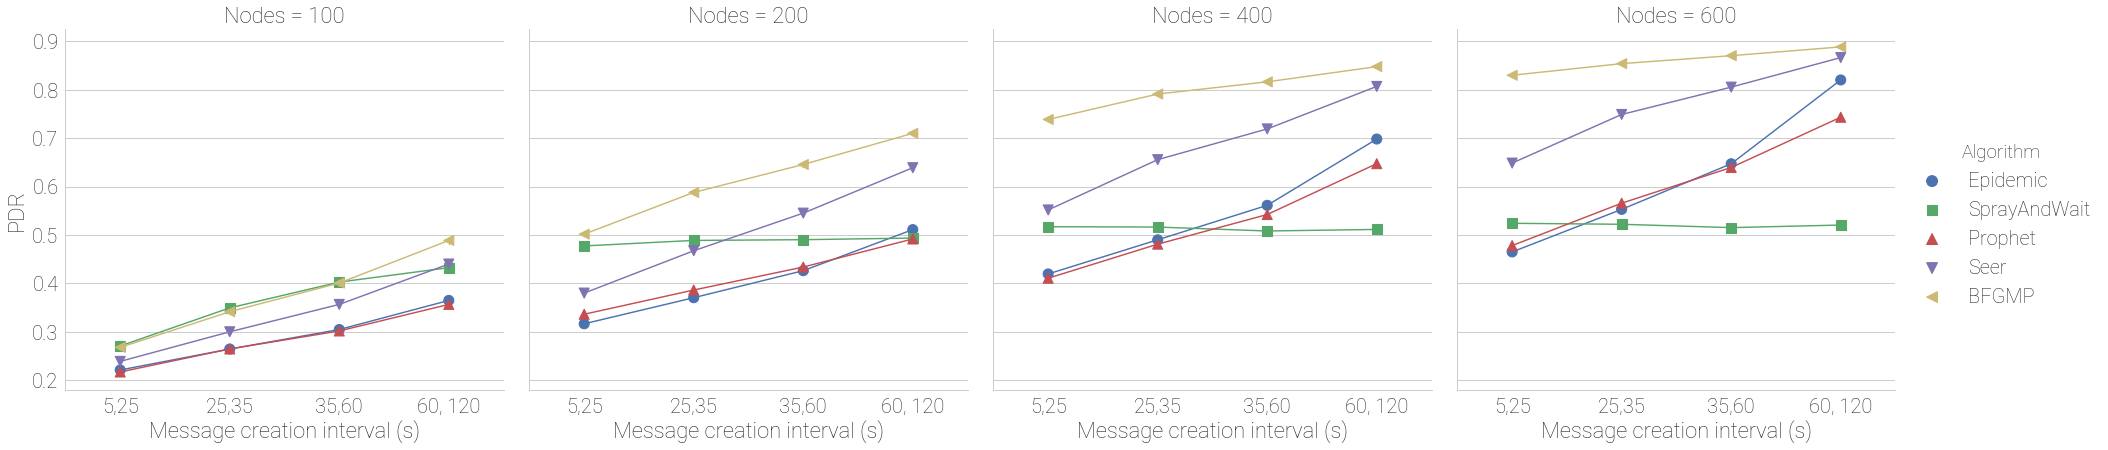

In [14]:
# Plot the delivery probability ratio
#Saves the Packet delivery ratio plot to svg/pdf
with PdfPages('MANET_pdr.pdf') as pdf:
    g = sns.factorplot(x='message_interval', y='delivery_prob', hue='router', data=df, col='nodes', order=x_axis_order, markers=markers, size=6.75)
    g.set_axis_labels('Message creation interval (s)', 'PDR')
    g._legend.set_title('Algorithm')
    g.set_titles('Nodes = {col_name}')
    for i in range(4):
        plt.setp(g.axes[0][i].collections, sizes=[100])
    g.savefig('MANET_pdr.svg')
    pdf.savefig()

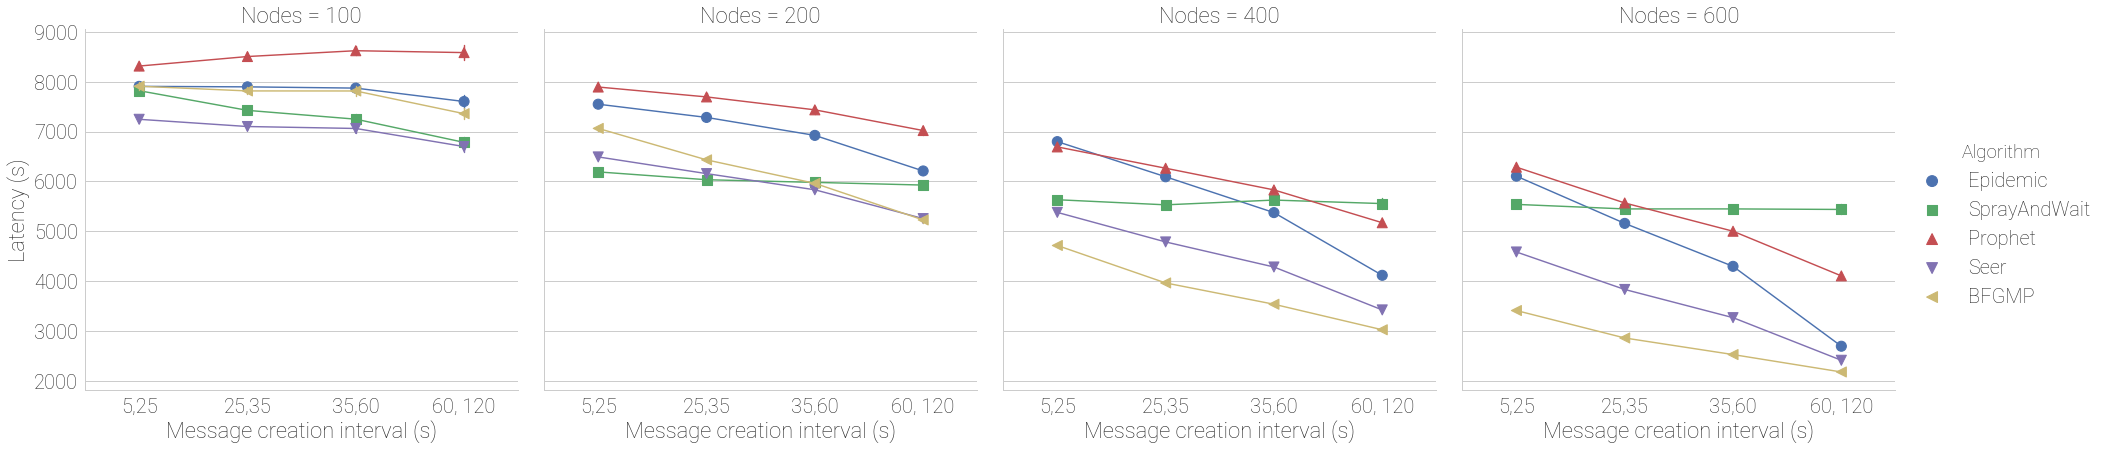

In [16]:
#Same as the above cell, for Latency
with PdfPages('MANET_latency.pdf') as pdf:
    g = sns.factorplot(x='message_interval', y='latency_avg', hue='router', data=df, col='nodes', order=x_axis_order, markers=markers, size=6.75)
    g.set_axis_labels('Message creation interval (s)', 'Latency (s)')
    g._legend.set_title('Algorithm')
    g.set_titles('Nodes = {col_name}')
    for i in range(4):
        plt.setp(g.axes[0][i].collections, sizes=[100])
    g.savefig('MANET_latency.svg')
    pdf.savefig()

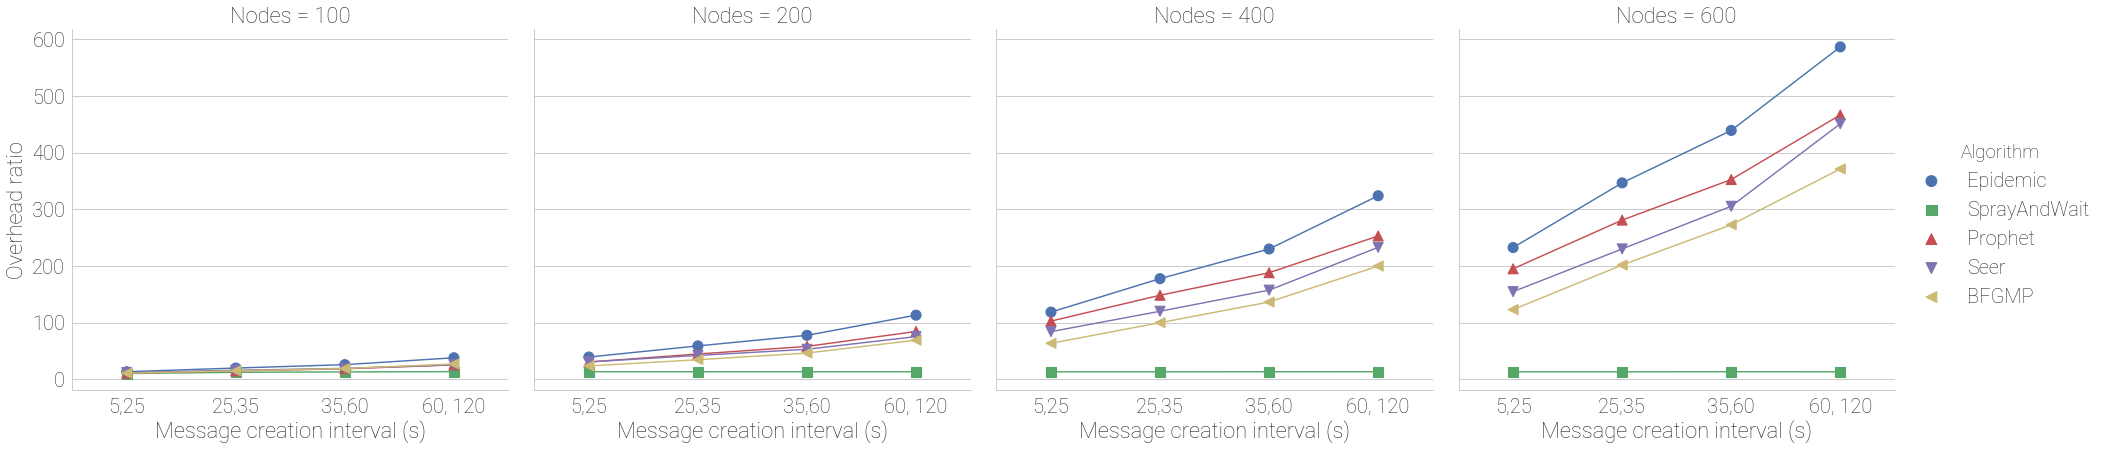

In [17]:
#Same as the above cell, for Latency
with PdfPages('MANET_overhead.pdf') as pdf:
    g = sns.factorplot(x='message_interval', y='overhead_ratio', hue='router', data=df, col='nodes', order=x_axis_order, markers=markers, size=6.75)
    g.set_axis_labels('Message creation interval (s)', 'Overhead ratio')
    g._legend.set_title('Algorithm')
    g.set_titles('Nodes = {col_name}')
    for i in range(4):
        plt.setp(g.axes[0][i].collections, sizes=[100])
    g.savefig('MANET_overhead.svg')
    pdf.savefig()